# Importing Dependencies

In [1]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
from collections import Counter

import warnings
warnings.filterwarnings('ignore')

# Importing Data From CSV File

In [2]:
all_data = pd.read_csv('Data/train.csv')
print('Sample Size:', len(all_data))
all_data.sample(10)

Sample Size: 31390


,seq_id,protein_sequence,pH,data_source,tm
8746,8746,MEEFGISPGQLVAVFWDKSSPEEALKKLVARLQELTGSEGQVFMEN...,7.0,doi.org/10.1038/s41592-020-0801-4,49.5
5288,5288,MALLRPHLHRFHSNTLRHSAYPSADAGGGLVVYPTYGRHRCSAIAI...,7.0,doi.org/10.1038/s41592-020-0801-4,38.9
18731,18731,MNIFEMLRIDERLRLKIYKDTEGYYTIGIGHLLTKSPSLNAAKSEL...,6.9,10.1021/bi00105a002,67.5
19717,19717,MNRIIFALDVYDYNEALNLSKELSNDVFAIKVNWPLVMNNGISIVK...,7.0,doi.org/10.1038/s41592-020-0801-4,76.5
28087,28087,MTTQDVIVNDQNDQKQCSNDVIFRSRLPDIYIPNHLPLHDYIFENI...,7.0,doi.org/10.1038/s41592-020-0801-4,45.2
17672,17672,MMKTVLIYYPFSLAAERNSGSKLRPYEMHQAFLRWGAKEGVDVLLI...,7.0,doi.org/10.1038/s41592-020-0801-4,66.5
15121,15121,MKVAKFGGSSVASAAQFRKVADIVSSDIERRIVVVSAPGKRYKDDV...,7.0,doi.org/10.1038/s41592-020-0801-4,64.6
1895,1895,GTVLLKDYVAGGACPSKATIPGKTVIVTGANTGIGKQTALELAKRG...,7.0,doi.org/10.1038/s41592-020-0801-4,40.8
2232,2232,KHLDLDGIHHHQHHLHSATTHHRRRLQRDSRAKDAVGGSTHQCDAV...,7.0,doi.org/10.1038/s41592-020-0801-4,49.2
6019,6019,MARRLRPVSRRELVARLKALGFSGPYTGGRHQFMVRGSIRLVLPNP...,7.0,doi.org/10.1038/s41592-020-0801-4,97.8


What are we initially given? 
- Amino acid sequence
- pH of the solution within the experiment
- tm: melting temperature (our <b>response variable</b>)

In [3]:
# removing useless columns
cols = list(all_data.columns)[1:]
cols.remove('data_source')
all_data = all_data[cols]
all_data

,protein_sequence,pH,tm
0,AAAAKAAALALLGEAPEVVDIWLPAGWRQPFRVFRLERKGDGVLVG...,7.0,75.7
1,AAADGEPLHNEEERAGAGQVGRSLPQESEEQRTGSRPRRRRDLGSR...,7.0,50.5
2,AAAFSTPRATSYRILSSAGSGSTRADAPQVRRLHTTRDLLAKDYYA...,7.0,40.5
3,AAASGLRTAIPAQPLRHLLQPAPRPCLRPFGLLSVRAGSARRSGLL...,7.0,47.2
4,AAATKSGPRRQSQGASVRTFTPFYFLVEPVDTLSVRGSSVILNCSA...,7.0,49.5
...,...,...,...
31385,YYMYSGGGSALAAGGGGAGRKGDWNDIDSIKKKDLHHSRGDEKAQG...,7.0,51.8
31386,YYNDQHRLSSYSVETAMFLSWERAIVKPGAMFKKAVIGFNCNVDLI...,7.0,37.2
31387,YYQRTLGAELLYKISFGEMPKSAQDSAENCPSGMQFPDTAIAHANV...,7.0,64.6
31388,YYSFSDNITTVFLSRQAIDDDHSLSLGTISDVVESENGVVAADDAR...,7.0,50.7


In [4]:
# dropping all NA values 
all_data = all_data.dropna()
all_data

,protein_sequence,pH,tm
0,AAAAKAAALALLGEAPEVVDIWLPAGWRQPFRVFRLERKGDGVLVG...,7.0,75.7
1,AAADGEPLHNEEERAGAGQVGRSLPQESEEQRTGSRPRRRRDLGSR...,7.0,50.5
2,AAAFSTPRATSYRILSSAGSGSTRADAPQVRRLHTTRDLLAKDYYA...,7.0,40.5
3,AAASGLRTAIPAQPLRHLLQPAPRPCLRPFGLLSVRAGSARRSGLL...,7.0,47.2
4,AAATKSGPRRQSQGASVRTFTPFYFLVEPVDTLSVRGSSVILNCSA...,7.0,49.5
...,...,...,...
31385,YYMYSGGGSALAAGGGGAGRKGDWNDIDSIKKKDLHHSRGDEKAQG...,7.0,51.8
31386,YYNDQHRLSSYSVETAMFLSWERAIVKPGAMFKKAVIGFNCNVDLI...,7.0,37.2
31387,YYQRTLGAELLYKISFGEMPKSAQDSAENCPSGMQFPDTAIAHANV...,7.0,64.6
31388,YYSFSDNITTVFLSRQAIDDDHSLSLGTISDVVESENGVVAADDAR...,7.0,50.7


# Data Exploration

### Amino Acid Sequence

In [5]:
all_sequences = list(all_data['protein_sequence'])

In [6]:
# adding amino acid length to the table
lengths = []
for seq in all_sequences: 
    lengths.append(len(seq))
    
all_data['length'] = lengths
all_data

,protein_sequence,pH,tm,length
0,AAAAKAAALALLGEAPEVVDIWLPAGWRQPFRVFRLERKGDGVLVG...,7.0,75.7,341
1,AAADGEPLHNEEERAGAGQVGRSLPQESEEQRTGSRPRRRRDLGSR...,7.0,50.5,286
2,AAAFSTPRATSYRILSSAGSGSTRADAPQVRRLHTTRDLLAKDYYA...,7.0,40.5,497
3,AAASGLRTAIPAQPLRHLLQPAPRPCLRPFGLLSVRAGSARRSGLL...,7.0,47.2,265
4,AAATKSGPRRQSQGASVRTFTPFYFLVEPVDTLSVRGSSVILNCSA...,7.0,49.5,1451
...,...,...,...,...
31385,YYMYSGGGSALAAGGGGAGRKGDWNDIDSIKKKDLHHSRGDEKAQG...,7.0,51.8,549
31386,YYNDQHRLSSYSVETAMFLSWERAIVKPGAMFKKAVIGFNCNVDLI...,7.0,37.2,469
31387,YYQRTLGAELLYKISFGEMPKSAQDSAENCPSGMQFPDTAIAHANV...,7.0,64.6,128
31388,YYSFSDNITTVFLSRQAIDDDHSLSLGTISDVVESENGVVAADDAR...,7.0,50.7,593


In [7]:
# analyzing length distribution
print('Minimum: ', min(lengths))
print('Maximum: ', max(lengths))
print('Average: ', round(np.average(lengths)))
print('Median: ', round(np.median(lengths)))
print('SD: ', round(np.std(lengths)))

Minimum:  5
Maximum:  32767
Average:  449
Median:  336
SD:  643


We will limit the scope of the study to proteins <b>100-1000 amino acids</b> in lenths. 

In [8]:
# removing samples with out of range sequence lengths
all_data = all_data[(100 <= all_data['length'])  & (all_data['length'] <= 1000)]
all_data

,protein_sequence,pH,tm,length
0,AAAAKAAALALLGEAPEVVDIWLPAGWRQPFRVFRLERKGDGVLVG...,7.0,75.7,341
1,AAADGEPLHNEEERAGAGQVGRSLPQESEEQRTGSRPRRRRDLGSR...,7.0,50.5,286
2,AAAFSTPRATSYRILSSAGSGSTRADAPQVRRLHTTRDLLAKDYYA...,7.0,40.5,497
3,AAASGLRTAIPAQPLRHLLQPAPRPCLRPFGLLSVRAGSARRSGLL...,7.0,47.2,265
5,AACFWRRTVIPKPPFRGISTTSARSTVMPAWVIDKYGKNEVLRFTQ...,7.0,48.4,380
...,...,...,...,...
31385,YYMYSGGGSALAAGGGGAGRKGDWNDIDSIKKKDLHHSRGDEKAQG...,7.0,51.8,549
31386,YYNDQHRLSSYSVETAMFLSWERAIVKPGAMFKKAVIGFNCNVDLI...,7.0,37.2,469
31387,YYQRTLGAELLYKISFGEMPKSAQDSAENCPSGMQFPDTAIAHANV...,7.0,64.6,128
31388,YYSFSDNITTVFLSRQAIDDDHSLSLGTISDVVESENGVVAADDAR...,7.0,50.7,593


In [9]:
# removing clear outlier
lengths = all_data['length']
print('Minimum: ', min(lengths))
print('Maximum: ', max(lengths))
print('Average: ', round(np.average(lengths)))
print('Median: ', round(np.median(lengths)))
print('SD: ', round(np.std(lengths)))

Minimum:  100
Maximum:  1000
Average:  373
Median:  330
SD:  206


(array([6069., 5200., 4368., 4203., 2724., 1695., 1247.,  893.,  639.,
         570.]),
 array([ 100.,  190.,  280.,  370.,  460.,  550.,  640.,  730.,  820.,
         910., 1000.]),
 <BarContainer object of 10 artists>)

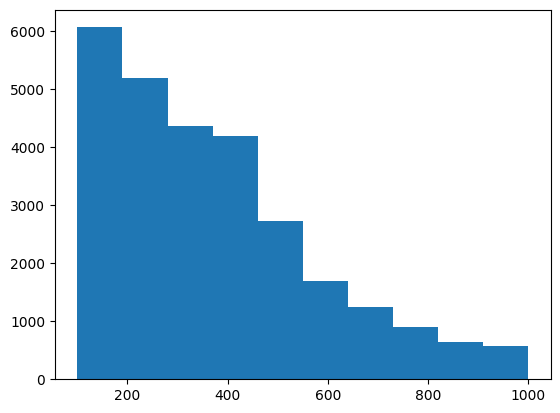

In [10]:
# visualizing the amino acid length distribution
plt.hist(lengths)

<BarContainer object of 20 artists>

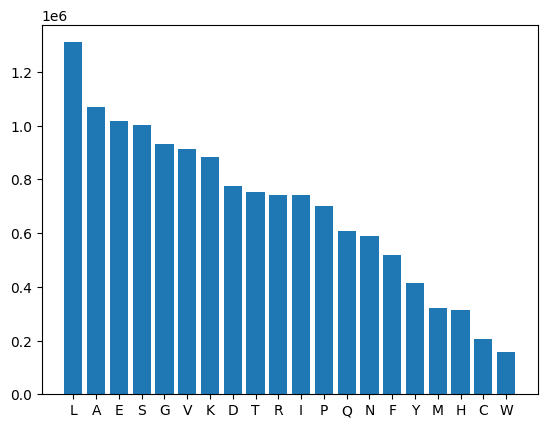

In [11]:
# analyzing amino acid frequencies
all_aa = ''
for seq in all_sequences: 
    all_aa += seq
    
# counting amino acids
aa_counter = Counter(all_aa)

# sorting in descending frequency 
aa_counter = {k: v for k, v in sorted(aa_counter.items(), key=lambda item: item[1], reverse=True)}

# total number of amino acids
aa_count = len(all_aa)

# plotting amino acid counts
plt.bar(aa_counter.keys(), aa_counter.values())

## pH 

In [12]:
# getting list of all pH values
all_pH = list(all_data['pH'])

print('Minimum: ', min(all_pH))
print('Maximum: ', max(all_pH))
print('Average: ', round(np.average(all_pH)))
print('Median: ', round(np.median(all_pH)))
print('SD: ', round(np.std(all_pH)))

Minimum:  1.99
Maximum:  64.9
Average:  7
Median:  7
SD:  1


We will limit the scope of the study to samples of <b>7.0 pH</b>. 

In [13]:
# removing samples with out of range pH
all_data = all_data[(7 == all_data['pH'])]
all_data

,protein_sequence,pH,tm,length
0,AAAAKAAALALLGEAPEVVDIWLPAGWRQPFRVFRLERKGDGVLVG...,7.0,75.7,341
1,AAADGEPLHNEEERAGAGQVGRSLPQESEEQRTGSRPRRRRDLGSR...,7.0,50.5,286
2,AAAFSTPRATSYRILSSAGSGSTRADAPQVRRLHTTRDLLAKDYYA...,7.0,40.5,497
3,AAASGLRTAIPAQPLRHLLQPAPRPCLRPFGLLSVRAGSARRSGLL...,7.0,47.2,265
5,AACFWRRTVIPKPPFRGISTTSARSTVMPAWVIDKYGKNEVLRFTQ...,7.0,48.4,380
...,...,...,...,...
31385,YYMYSGGGSALAAGGGGAGRKGDWNDIDSIKKKDLHHSRGDEKAQG...,7.0,51.8,549
31386,YYNDQHRLSSYSVETAMFLSWERAIVKPGAMFKKAVIGFNCNVDLI...,7.0,37.2,469
31387,YYQRTLGAELLYKISFGEMPKSAQDSAENCPSGMQFPDTAIAHANV...,7.0,64.6,128
31388,YYSFSDNITTVFLSRQAIDDDHSLSLGTISDVVESENGVVAADDAR...,7.0,50.7,593


In [14]:
# removing the pH column from the table
all_data = all_data[['protein_sequence', 'length', 'tm']]

# resetting index
all_data = all_data.reset_index(drop = True)
all_data

,protein_sequence,length,tm
0,AAAAKAAALALLGEAPEVVDIWLPAGWRQPFRVFRLERKGDGVLVG...,341,75.7
1,AAADGEPLHNEEERAGAGQVGRSLPQESEEQRTGSRPRRRRDLGSR...,286,50.5
2,AAAFSTPRATSYRILSSAGSGSTRADAPQVRRLHTTRDLLAKDYYA...,497,40.5
3,AAASGLRTAIPAQPLRHLLQPAPRPCLRPFGLLSVRAGSARRSGLL...,265,47.2
4,AACFWRRTVIPKPPFRGISTTSARSTVMPAWVIDKYGKNEVLRFTQ...,380,48.4
...,...,...,...
23457,YYMYSGGGSALAAGGGGAGRKGDWNDIDSIKKKDLHHSRGDEKAQG...,549,51.8
23458,YYNDQHRLSSYSVETAMFLSWERAIVKPGAMFKKAVIGFNCNVDLI...,469,37.2
23459,YYQRTLGAELLYKISFGEMPKSAQDSAENCPSGMQFPDTAIAHANV...,128,64.6
23460,YYSFSDNITTVFLSRQAIDDDHSLSLGTISDVVESENGVVAADDAR...,593,50.7


## Melting Temperature (Response Variable)

Minimum:  0.0
Maximum:  108.5
Average:  50
Median:  48
SD:  13


(array([5.0000e+00, 4.8300e+02, 3.6500e+02, 5.4620e+03, 1.1964e+04,
        2.4160e+03, 1.3010e+03, 8.9700e+02, 5.5200e+02, 1.7000e+01]),
 array([  0.  ,  10.85,  21.7 ,  32.55,  43.4 ,  54.25,  65.1 ,  75.95,
         86.8 ,  97.65, 108.5 ]),
 <BarContainer object of 10 artists>)

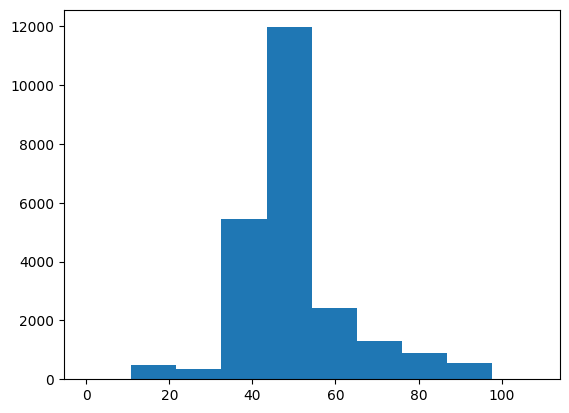

In [15]:
# analyzing the distribution of the response variable
all_tm = all_data['tm']
print('Minimum: ', min(all_tm))
print('Maximum: ', max(all_tm))
print('Average: ', round(np.average(all_tm)))
print('Median: ', round(np.median(all_tm)))
print('SD: ', round(np.std(all_tm)))

plt.hist(all_tm)

## Sequence Length vs Melting Temperature

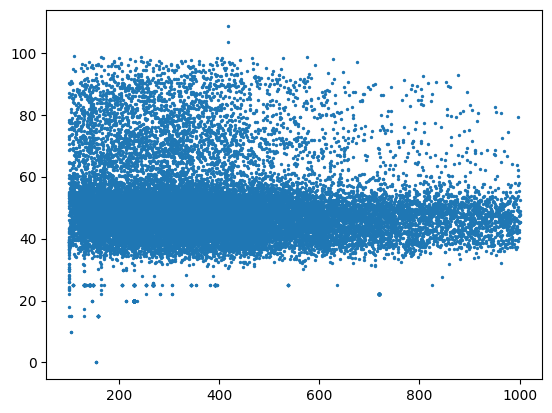

In [16]:
plt.scatter(list(all_data['length']), list(all_data['tm']), s=2)
plt.show()

At a glance, no clear relationship between sequence length and melting temperature.

### Adding Unique Identifier to Each Entry

In [18]:
all_data.insert(loc=0, column='ID', value=range(1, len(all_data)+1))
all_data

,ID,protein_sequence,length,tm
0,1,AAAAKAAALALLGEAPEVVDIWLPAGWRQPFRVFRLERKGDGVLVG...,341,75.7
1,2,AAADGEPLHNEEERAGAGQVGRSLPQESEEQRTGSRPRRRRDLGSR...,286,50.5
2,3,AAAFSTPRATSYRILSSAGSGSTRADAPQVRRLHTTRDLLAKDYYA...,497,40.5
3,4,AAASGLRTAIPAQPLRHLLQPAPRPCLRPFGLLSVRAGSARRSGLL...,265,47.2
4,5,AACFWRRTVIPKPPFRGISTTSARSTVMPAWVIDKYGKNEVLRFTQ...,380,48.4
...,...,...,...,...
23457,23458,YYMYSGGGSALAAGGGGAGRKGDWNDIDSIKKKDLHHSRGDEKAQG...,549,51.8
23458,23459,YYNDQHRLSSYSVETAMFLSWERAIVKPGAMFKKAVIGFNCNVDLI...,469,37.2
23459,23460,YYQRTLGAELLYKISFGEMPKSAQDSAENCPSGMQFPDTAIAHANV...,128,64.6
23460,23461,YYSFSDNITTVFLSRQAIDDDHSLSLGTISDVVESENGVVAADDAR...,593,50.7


### Exporing Data to New CSV

In [19]:
all_data.to_csv('Data/train_clean.csv', index=False)